## 훈련과정 : R·파이썬 기반 빅데이터 분석 전문가 양성과정
- 교과목 평가 : 빅데이터 분석결과 시각화
- 성명 : 위정훈
- 점수 : 60

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#### Q1. 'auto-mpg.csv' 데이터셋을 df 이름으로 불러온 후 아래 사항을 수행하세요. --- (20점)
- df.columns = ['mpg','cylinders','displacement','horsepower','weight','model year','origin','name']
- mpg , cylinders, weight, displacement, acceleration 칼럼만을 선택해서 df_s 이름으로 저장하고 처음 5개행을 출력하세요.
- df_s에서 mpg와 각 칼럼간의 산점도를 그리고 음의 상관관계가 있는 변수를 기술하세요.

,mpg,cylinders,weight,displacement,acceleration
0,18.0,8,3504.0,307.0,12.0
1,15.0,8,3693.0,350.0,11.5
2,18.0,8,3436.0,318.0,11.0
3,16.0,8,3433.0,304.0,12.0
4,17.0,8,3449.0,302.0,10.5


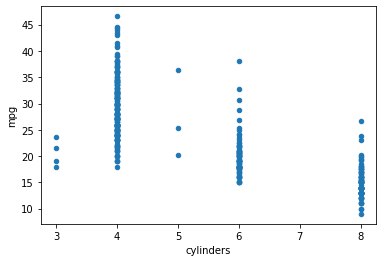

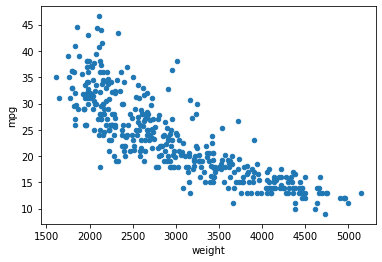

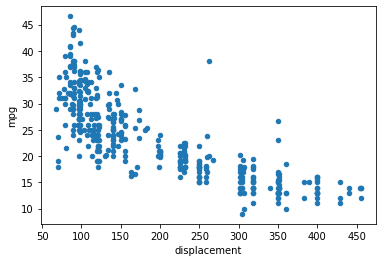

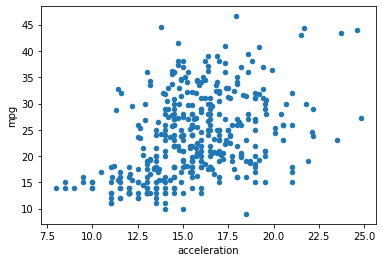

mpg와 음의 상관관계가 있는 변수 == cylinders, weight, displacement


In [29]:
df = pd.read_csv('auto-mpg.csv', header=None)
# display (df.head())

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
# display (df.head())

df_s = df.loc[:, ['mpg' , 'cylinders', 'weight', 'displacement', 'acceleration']]
display (df_s.head())

# print (df_s.columns)
for i in range(1, len( df_s.columns)) :
    # print (i)
    df_s.plot(x = df_s.columns[i] , y = 'mpg', kind='scatter',)
    plt.show()

print ('mpg와 음의 상관관계가 있는 변수 == cylinders, weight, displacement')

#### Q2. df_s의 각 컬럼간의 상관관계에 대한 시각화를 아래와 같이 수행하세요.
- 2개의 행과 2개의 열을 가진 subplots를 이용해서 표현
- Seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현

['cylinders', 'weight', 'displacement', 'acceleration']


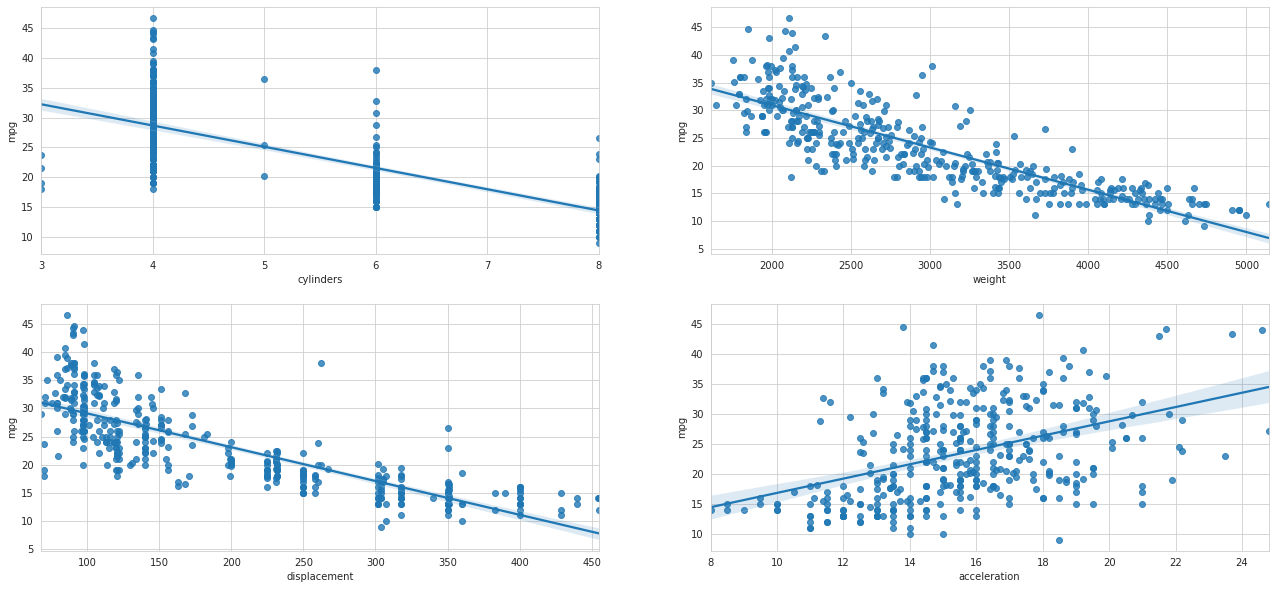

In [115]:
sns.set_style ('whitegrid')

fig, axs = plt.subplots(figsize=(22, 10), ncols=2, nrows=2)
features = [ df_s.columns[i] for i in range(1, len( df_s.columns))]
print (features)

for i, f in enumerate(features) :
    sns.regplot(x=f, y = 'mpg', data=df, ax=axs[i//2][i%2])

#### Q3. auto_mpg.csv 파일을 df 이름으로 불러와서 horsepower열에 대한 히스토그램을 그린 후 출력하세요.
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

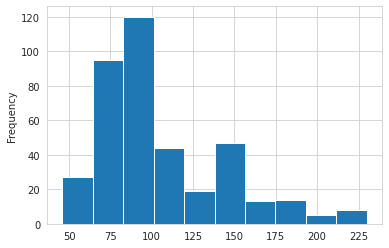

In [114]:
import numpy as np

df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

# df.plot(kind='hist')

# display(df.horsepower)
# print (df.info())
# print (df.horsepower.describe())
# print (df.horsepower.isnull().sum())
# print (df['horsepower'].unique())
df.horsepower.replace('?', np.nan, inplace=True)
df.dropna(subset = ['horsepower'], axis=0, inplace=True)
# print (df['horsepower'].unique())

# display (df.horsepower.sample(10))
def tofl(x) : return float(x)
# print (tofl('130.00'))
df.horsepower = df.horsepower.apply(tofl)
# print (df.horsepower.dtype)
df['horsepower'].plot(kind='hist')

plt.show()

#### Q4. 아래 사항을 준수하여 막대 그래프(barplot)를 출력하세요.
- Seaborn 제공 데이터셋 가져오기 : titanic = sns.load_dataset('titanic')
- sns.barplot 이용
- 스타일 테마 설정 : sns.set_style('whitegrid')
- 그래프 객체 생성 : figure에 3개의 서브 플롯을 생성
- x축, y축에 변수 할당 : x='sex', y='survived', data=titanic, ax=ax1
- x축, y축에 변수 할당하고 hue 옵션 추가 : x='sex', y='survived', hue='class', data=titanic, ax=ax2
- x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력 : x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3
- 차트 제목 표시\
ax1.set_title('titanic survived - sex')\
ax2.set_title('titanic survived - sex/class')\
ax3.set_title('titanic survived - sex/class(stacked)')

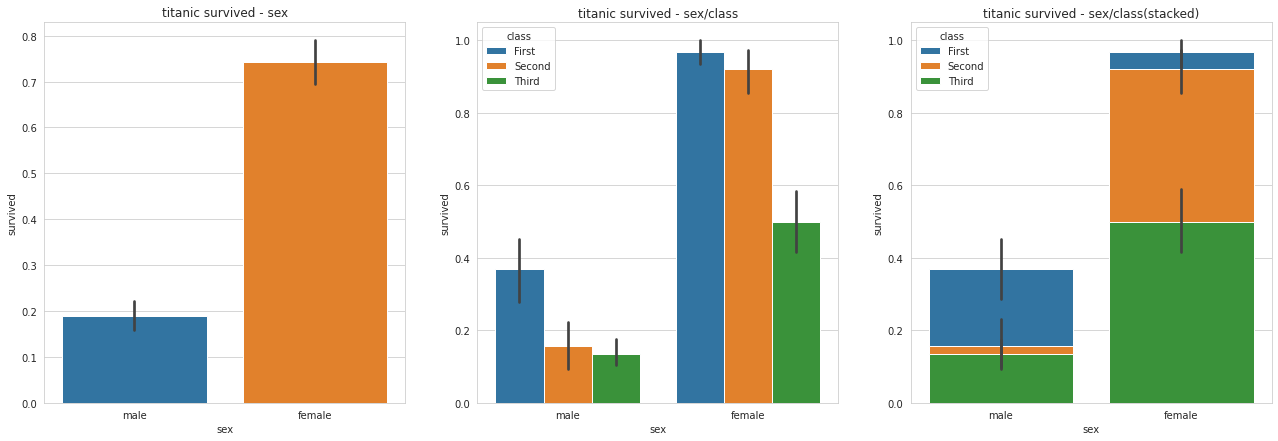

In [100]:
# from sklearn.preprocessing import LabelEncoder

titanic = sns.load_dataset('titanic')
# display (titanic.sample(3))
# titanic['sex'] = LabelEncoder().fit(titanic['sex']).transform(titanic['sex'])

sns.set_style('whitegrid')

fig = plt.figure(figsize=(22, 7), )
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot('sex', 'survived', data=titanic, ax=ax1, )
sns.barplot(x='sex', y= 'survived', hue='class', data=titanic, ax=ax2)
sns.barplot(x='sex', y= 'survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

#### Q5. 아래 사항을 준수하여 빈도 그래프(countplot)를 출력하세요.
- Seaborn 제공 데이터셋 가져오기 : titanic = sns.load_dataset('titanic')
- sns.countplot 이용
- 스타일 테마 설정 : sns.set_style('whitegrid')
- 그래프 객체 생성 : figure에 3개의 서브 플롯을 생성
- 기본값 : x='class', palette='Set1', data=titanic, ax=ax1
- hue 옵션에 'who' 추가  : x='class', hue='who', palette='Set2', data=titanic, ax=ax2
- dodge=False 옵션 추가 : x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3
- 차트 제목 표시\
ax1.set_title('titanic class')\
ax2.set_title('titanic class - who')\
ax3.set_title('titanic class - who(stacked)')

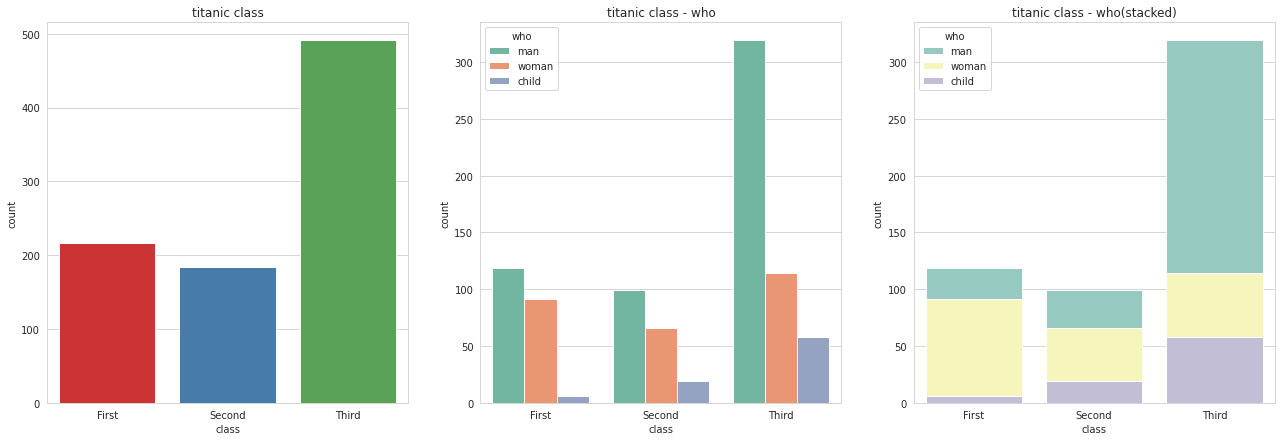

In [103]:
titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig = plt.figure(figsize=(22, 7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)
sns.countplot( x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

# Q6. 타이타닉 생존자 예측 모델 개발을 위한 최종 선정 변수와 그 이유를 논하시오 (20점)

- titanic3 분석용 데이터에 대한 탐색적 분석 결과 반영

In [149]:
from sklearn.preprocessing import LabelEncoder

## Preprocessing

# import data file
titanic = pd.read_csv('titanic3.csv')
# print (titanic.info())

# drop unnecessary columns
titanic.drop(['name', 'ticket', 'home.dest', 'body', 'embarked'], axis=1, inplace=True)

# null data
titanic.age.fillna(value = titanic.age.mean(), inplace=True)

titanic.fare.fillna(value= titanic.fare.mean(), inplace=True )

titanic.cabin = titanic['cabin'].str[:1]
titanic.cabin.fillna(value='X',inplace=True,)
# print (titanic.cabin.unique())
# print (titanic.cabin.sample(10))

titanic.boat = titanic.boat.notnull().astype(int)
# print (titanic.boat.unique())

# data type transform

# print (titanic.info())
titanic.sex = LabelEncoder().fit_transform(titanic.sex)
titanic.cabin = LabelEncoder().fit_transform(titanic.cabin)
titanic.boat = LabelEncoder().fit_transform(titanic.boat)

titanic['fam'] = titanic.sibsp+titanic.parch
titanic.drop(['sibsp','parch'], axis=1, inplace=True)

print (titanic.info())

display (titanic.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null float64
fare        1309 non-null float64
cabin       1309 non-null int64
boat        1309 non-null int64
fam         1309 non-null int64
dtypes: float64(2), int64(6)
memory usage: 81.9 KB
None


,pclass,survived,sex,age,fare,cabin,boat,fam
911,3,0,1,21.000000,8.4333,8,0,0
670,3,0,1,26.000000,7.7750,8,0,0
210,1,0,1,55.000000,30.5000,2,0,0
595,2,0,1,29.881138,12.8750,8,0,0
1203,3,0,1,40.000000,7.8958,8,0,0
547,2,0,1,23.000000,15.0458,8,0,0
739,3,0,1,44.000000,16.1000,8,0,1
867,3,1,0,22.000000,12.2875,8,1,2
1154,3,0,1,29.881138,8.0500,8,0,0
223,1,0,1,29.881138,0.0000,8,0,0


In [156]:
titanic.corr()

,pclass,survived,sex,age,fare,cabin,boat,fam
pclass,1.000000,-0.312469,0.124617,-0.366371,-0.558477,0.734749,-0.323428,0.050027
survived,-0.312469,1.000000,-0.528693,-0.050198,0.244208,-0.287591,0.948190,0.026876
sex,0.124617,-0.528693,1.000000,0.057397,-0.185484,0.125487,-0.482086,-0.188583
age,-0.366371,-0.050198,0.057397,1.000000,0.171521,-0.293861,-0.048172,-0.196996
fare,-0.558477,0.244208,-0.185484,0.171521,1.000000,-0.547236,0.252660,0.226465
cabin,0.734749,-0.287591,0.125487,-0.293861,-0.547236,1.000000,-0.300030,-0.013592
boat,-0.323428,0.948190,-0.482086,-0.048172,0.252660,-0.300030,1.000000,0.031397
fam,0.050027,0.026876,-0.188583,-0.196996,0.226465,-0.013592,0.031397,1.000000


['pclass', 'survived', 'sex', 'age', 'fare', 'cabin', 'boat', 'fam']


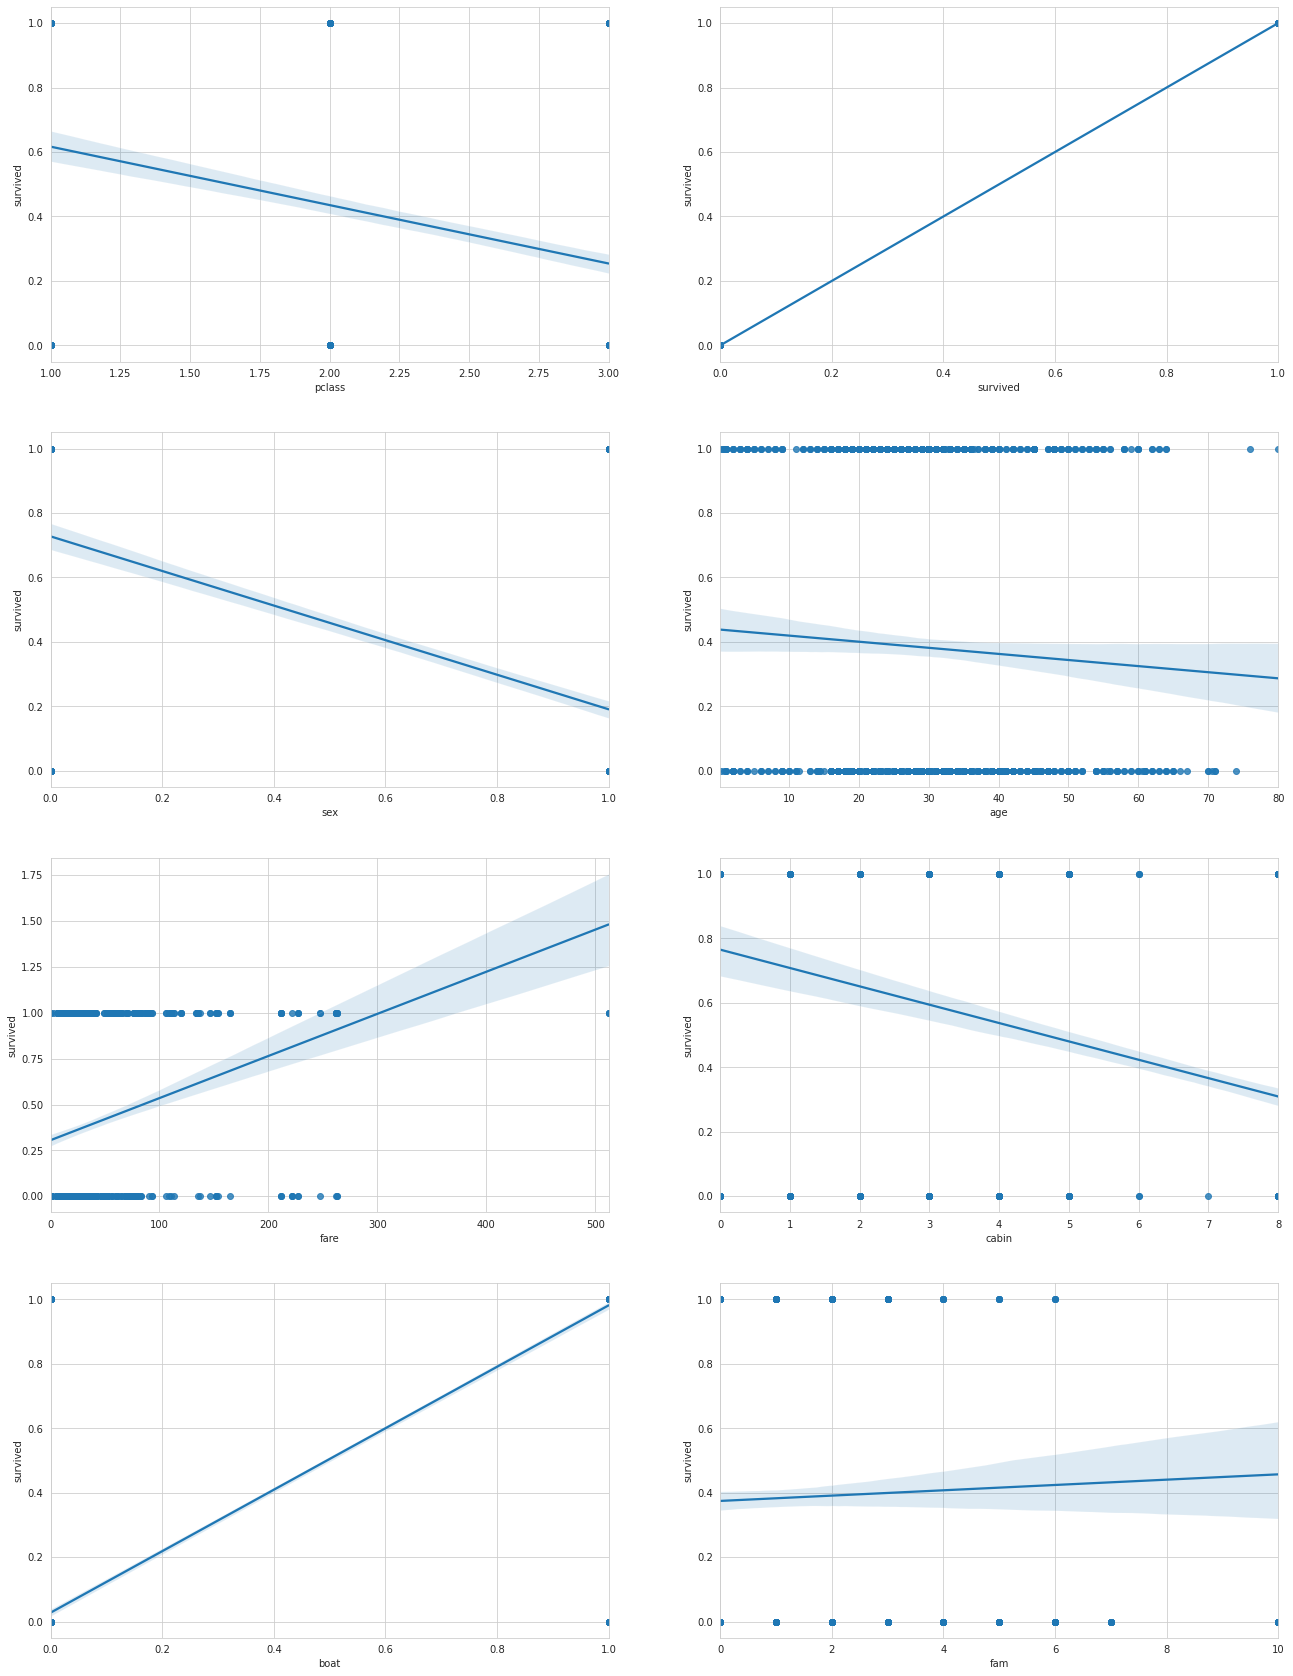

In [157]:
sns.set_style ('whitegrid')

fig, axs = plt.subplots(figsize=(22, 30), ncols=2, nrows=4)
features = [ titanic.columns[i] for i in range(len( titanic.columns))]
print (features)

for i, f in enumerate(features) :
    sns.regplot(x=f, y = 'survived', data=titanic, ax=axs[i//2][i%2], )

In [158]:
print ('생존 survived 와 가장 연관관계가 높은 변수는 boat(0.948190), sex(-0.528693) 순으로 나타났다\n보트를 탄 경우(1)에는 타지 않은 경우(0) 보다 훨씬 생존률이 높고, 여성인 경우 남성인 경우 보다 훨씬 생존률이 높았다.\n따라서 최종 변수를 boat, sex 로 선정한다')

생존 survived 와 가장 연관관계가 높은 변수는 boat(0.948190), sex(-0.528693) 순으로 나타났다
보트를 탄 경우(1)에는 타지 않은 경우(0) 보다 훨씬 생존률이 높고, 여성인 경우 남성인 경우 보다 훨씬 생존률이 높았다.
따라서 최종 변수를 boat, sex 로 선정한다
